# LIVE MNIST 

The LIVE MNIST project aims to create an interactive and dynamic visualization of the training, validation, and testing process for the well-known MNIST dataset. Users will be able to configure the number of layers and nodes in a Convolutional Neural Network (CNN) and observe a live representation of the model’s structure and learning progress directly on a web interface. Additionally, the project will feature an interactive drawing tool where users can sketch digits in real-time and instantly see the model’s predicted probabilities for each number, making the experience both educational and engaging.

1) MODEL rep

In [137]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [138]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Basic libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

This are the directions of our training and testing data

In [3]:
train_x = "dataset/train-images.idx3-ubyte"
train_y = "dataset/train-labels.idx1-ubyte"
test_x = "dataset/t10k-images.idx3-ubyte"
test_y = "dataset/t10k-labels.idx1-ubyte"

train_csv = "./csv_files/train.csv"
test_csv = "./csv_files/test.csv"

We will convert the ubyte into csv. 

In [4]:
def convert (imgs, labels, outline, n):
    imgf = open(imgs, 'rb') #this function opens the ubyte file.
    labelf = open(labels, 'rb')
    csvf = open(outline, 'w')

    imgf.read(16) #Jumping few bytes due to metadata
    labelf.read(8)
    images = []

    for i in range(n):
        image = [ord(labelf.read(1))] #The reason is 1 is because you want to read just 1 byte. When readed, it automatically jumps to next byte.
        for j in range(28*28):
            image.append(ord(imgf.read(1))) #When appending single num, we added to the list we are in.
        images.append(image)  #Finally adding the existing list to another one.
    
    for image in images:
        csvf.write(",".join(str(plx) for plx in image)+ "\n") #The conversion into csv file.

    imgf.close()
    labelf.close()
    csvf.close()

In [5]:
convert(train_x, train_y, train_csv, 60000) #generating the files
convert(test_x, test_y, test_csv, 10000)

In [14]:
train_file = open(train_csv, 'r')  
train_list = train_file.readlines()
train_file.close()
print(len(train_list))
num = 2

60000


In [15]:
train_list[num]

'4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,232,39,0,0,0,0,0,0,0,0,0,62,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,180,39,0,0,0,0,0,0,0,0,0,126,163,0,0,0,0,0,0,0,0,0,0,0,0,0,2,153,210,40,0,0,0,0,0,0,0,0,0,220,163,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,162,0,0,0,0,0,0,0,0,0,0,222,163,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,125,0,0,0,0,0,0,0,0,0,46,245,163,0,0,0,0,0,0,0,0,0,0,0,0,0,198,254,56,0,0,0,0,0,0,0,0,0,120,254,163,0,0,0,0,0,0,0,0,0,0,0,0,23,231,254,29,0,0,0,0,0,0,0,0,0,159,254,120,0,0,0,0,0,0,0,0,0,0,0,0,163,254,216,16,0,0,0,0,0,0,0,0,0,159,254,67,0,0,0,0,0,0,0,0,0,14,86,178,248,254,91,0,0,0,0,0,0,0,0,0,0,159,254,85,0,0,0,47,49,116,144,150,241,243,234,179,241,252,40,0,0,0,0,0,0,0,0,0,0,150,253,237,207,207,207,253,254,250,2

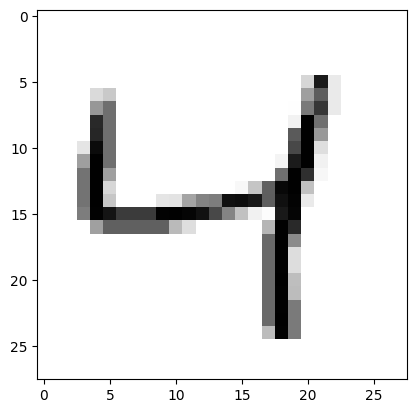

In [27]:
values = train_list[num].split(",")
images_array = np.asarray(values[1:], dtype=float).reshape((28,28))
plt.imshow(images_array, cmap = "Grays", interpolation = "None")

This is just for representing the photos (using ubyte)

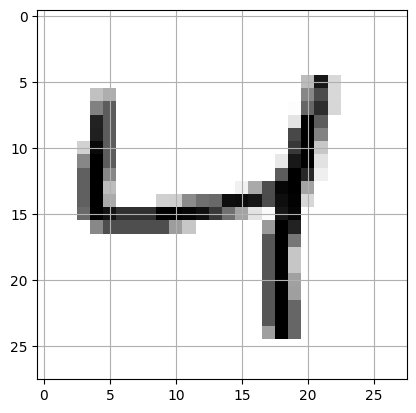

In [16]:
def load_images(archivo, num_imagenes):
    with open(archivo, "rb") as f:
        f.read(16)  
        datos = np.frombuffer(f.read(num_imagenes * 28 * 28), dtype=np.uint8)
        return datos.reshape(num_imagenes, 28, 28)

def rep_images(pixels):
    imagen = np.array(pixels, dtype=np.uint8).reshape(28, 28)
    plt.imshow(imagen, cmap="gray_r")
    plt.axis("on")
    plt.grid(True, "major")
    plt.show()


imagenes = load_images(train_x, num_imagenes=60000)
pruev = imagenes[num]


rep_images(pruev)

In [17]:
imagenes.shape

(60000, 28, 28)

In [18]:
image_matrix = np.array(pruev)
df = pd.DataFrame(image_matrix)
print(df.to_string(index=False, header=False))

0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232 39 0 0 0 0 0
0 0 0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180 39 0 0 0 0 0
0 0 0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210 40 0 0 0 0 0
0 0 0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  27 254 162  0 0 0 0 0 0
0 0 0   0 222 163   0   0   0   0   0   0   0   0   0   0   0   0   0 183 254 125  0 0 0 0 0 0
0 0 0  46 245 163   0   0   0   0   0   0   0   0 